# EGH444 Demonstration Jupyter File

Build based on example from [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md)

Source tensorflow used from [installation instructions](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md)

This and similar code available at *Guthub*

# Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# Setting up environment
# This is needed to display the images.
%matplotlib inline

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Model preparation 

## Variables

Those variables used after creating inference graph.

In [2]:

# Path to frozen detection graph. This is the actual model that is used for the object detection.
# PATH_TO_CKPT = 'output_incep_10/frozen_inference_graph.pb' # Fullview - 10h
# PATH_TO_CKPT = 'output_incep_10_single/frozen_inference_graph.pb' # Single view 10h

PATH_TO_CKPT = 'output_resnet_55/frozen_inference_graph.pb' # Single view 55h

#PATH_TO_CKPT = 'output_gray_24/frozen_inference_graph.pb' # Single gray 24h

#PATH_TO_CKPT = 'output_rgb_resnet_17/frozen_inference_graph.pb' # Single gray 24h

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'label_full.pbtxt'

NUM_CLASSES = 3

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [3]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
detection_graph = tf.Graph()

# Loading graph
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Support functions
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size    
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
    

# Detection

In [4]:
# For range has to be set by number of images appeared in testing graph.
PATH_TO_TEST_IMAGES_DIR = 'EYE_val'
PATH_TO_SINGLE_IMAGES_DIR = 'EYE_valout_out'

n_img = 16
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'EYE_va{:02d}.jpg'.format(i)) for i in range(1, n_img) ] #11
TEST_LEFT_PATHS = [ os.path.join(PATH_TO_SINGLE_IMAGES_DIR, 'EyeLeftTest{}.jpg'.format(i)) for i in range(1, n_img) ]
TEST_RIGHT_PATHS = [ os.path.join(PATH_TO_SINGLE_IMAGES_DIR, 'EyeRightTest{}.jpg'.format(i)) for i in range(1, n_img) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

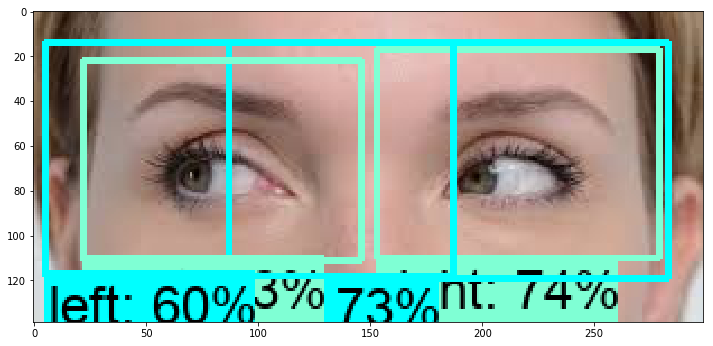

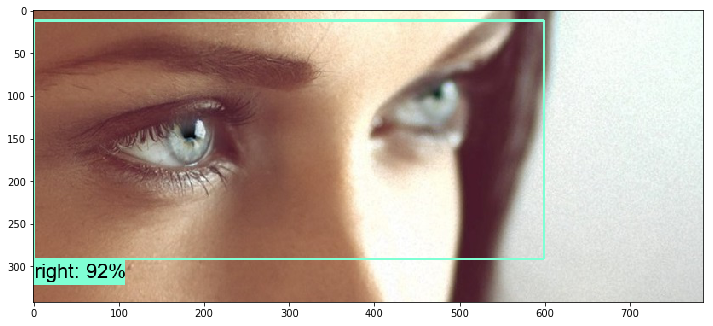

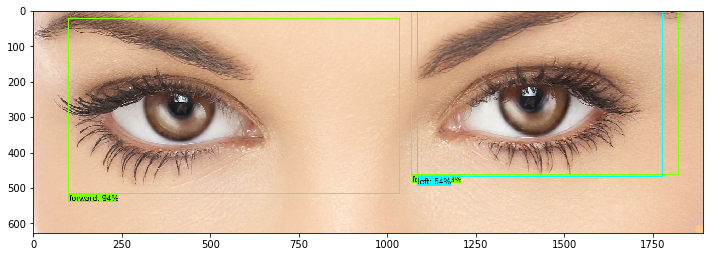

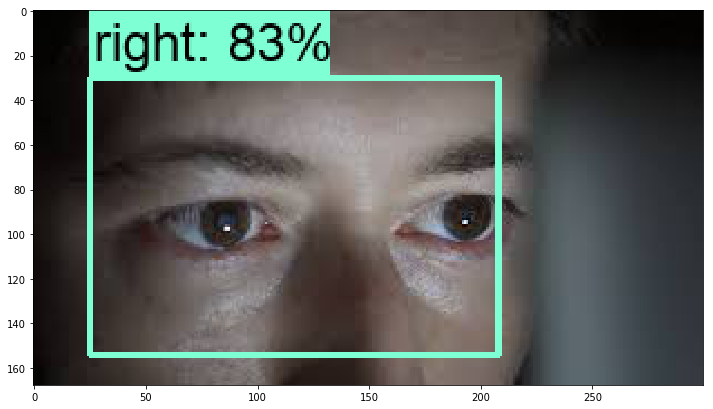

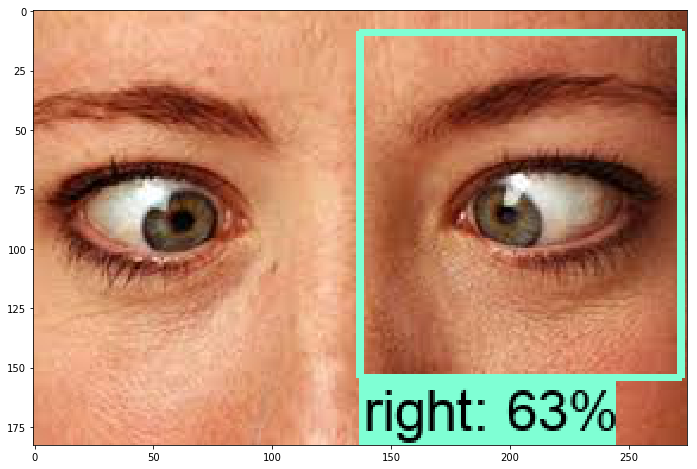

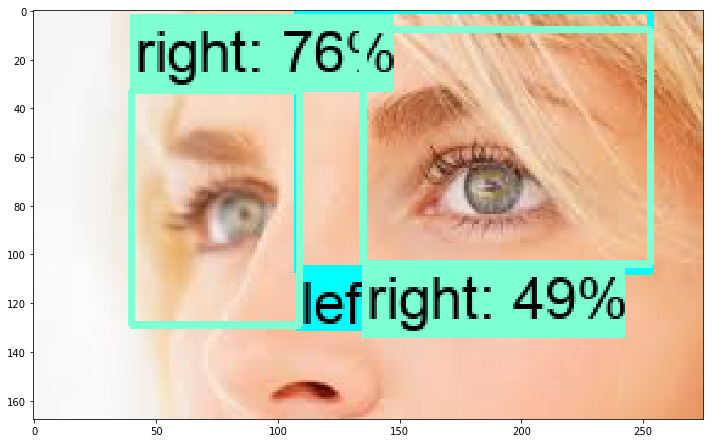

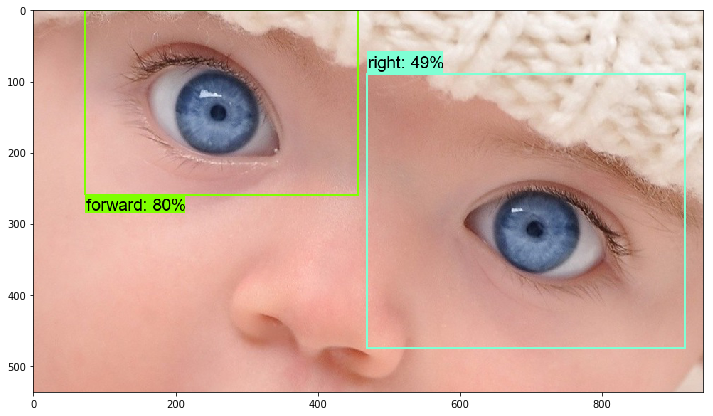

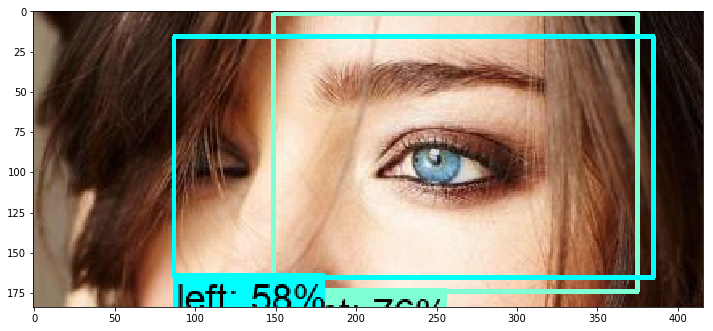

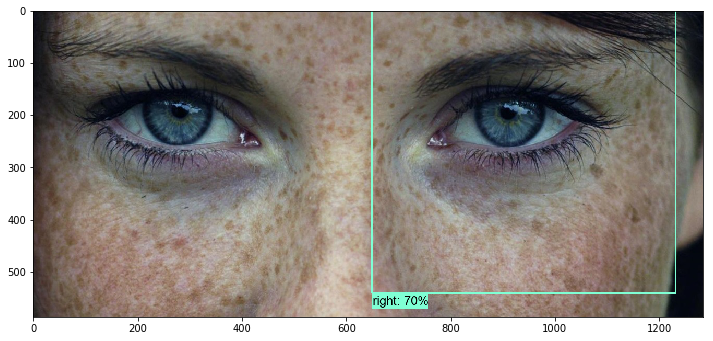

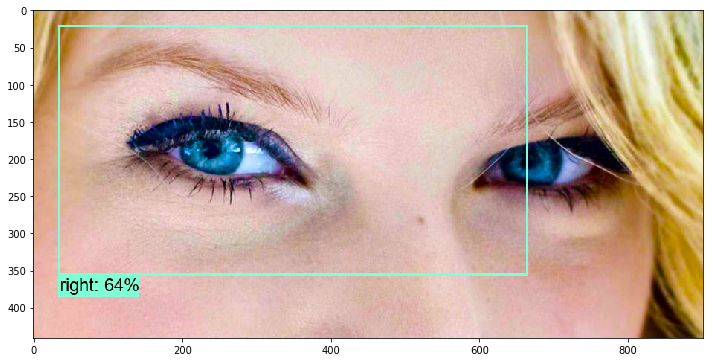

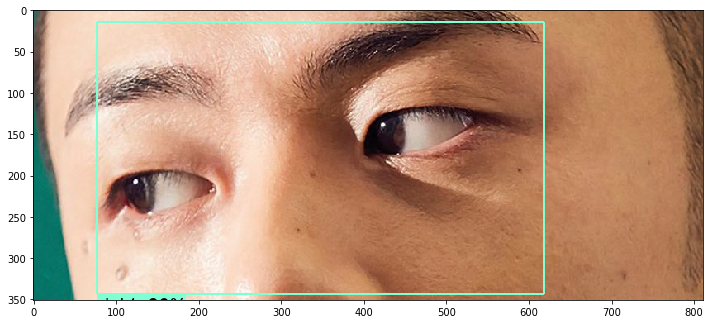

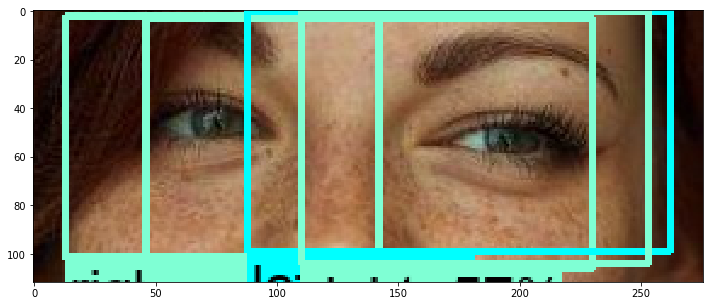

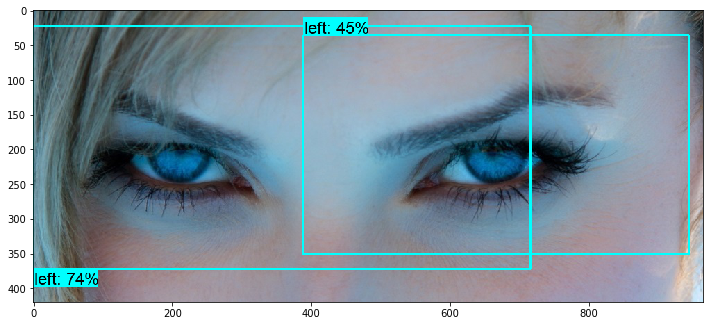

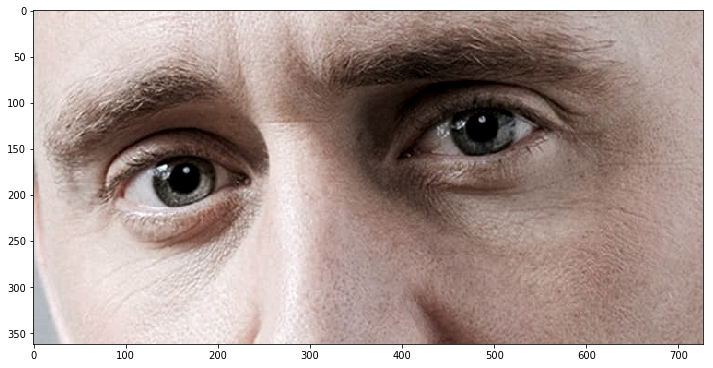

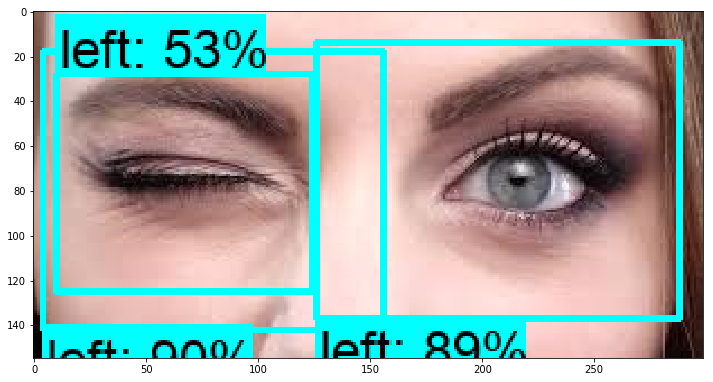

In [5]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:

        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
          image = Image.open(image_path)
          # the array based representation of the image will be used later in order to prepare the
          # result image with boxes and labels on it.

          # Frayscale tp 3D array      
    #       new_img = np.stack((image,)*3, -1)
    #       image = Image.fromarray(new_img)

          # Save (if necessary)
          #file, ext = os.path.splitext(image_path)
          #image.save(file + ".thumbnail", "JPEG")
          #image = Image.open(file + ".thumbnail") 


          ##
          image_np = load_image_into_numpy_array(image)
          # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
          image_np_expanded = np.expand_dims(image_np, axis=0)
          # Actual detection.
          (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})
          # Visualization of the results of a detection.
          #print(np.squeeze(scores))
          vis_util.visualize_boxes_and_labels_on_image_array(
              image_np,
              np.squeeze(boxes),
              np.squeeze(classes).astype(np.int32),
              np.squeeze(scores),
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=4,
              min_score_thresh=.45,
              groundtruth_box_visualization_color='black',
              line_thickness=3)
          # print (boxes, scores, classes)
          plt.figure(figsize=IMAGE_SIZE)
          plt.imshow(image_np)